
# What is PyTorch?

It’s a Python based scientific computing package targeted at two sets of audiences:

-  Tensorial library that uses the power of GPUs
-  A deep learning research platform that provides maximum flexibility and speed

Tensor is a term for the generalization of vectors (a quantity that has a **magnitude** and **direction**, for example, 5 meters *to the left*) to multiple directions/dimensions (5 meters *to the left and to the right*). The number of directions is referred to as the **rank** of the tensor. If that is confusing, just think of them as matrices. Matrix multiplication pops up a lot in machine learning and so having a library that can implement matrices and perform matrix multiplication **very fast** is very nice to have...i.e. PyTorch!

As an aside... if you are ever performing any matrix multiplication and you want it to be as fast as possible you should definitely implement it in PyTorch/some other ML library that includes GPU acceleration. PyTorch under-the-hood is all highly optimized C++ code that can be run in parallel on GPUs very efficiently. You'll never write any code that is faster than what is already implemented in PyTorch (unless this is your job and likely then you'll just be expanding PyTorch/other libraries's capabilities ;)  )

## Import the library

In [4]:
import torch  # <Ctrl> / <Shift> + <Return>

## Getting help in Jupyter
These are just some tips for using Jupyter Notebook

In [3]:
torch.sq  # <Tab>

AttributeError: module 'torch' has no attribute 'sq'

In [2]:
# What about all `*Tensor`s?
torch.*Tensor?

In [4]:
torch.nn.Module()  # <Shift>+<Tab>

Module()

In [5]:
# Annotate your functions / classes!
torch.nn.Module?

In [6]:
torch.nn.Module??

## Dropping to Bash: magic!

In [7]:
! ls -lh

total 4.7M
-rw-r--r-- 1 aj aj 115K Aug 20 17:23  01-tensor_tutorial.ipynb
-rw-r--r-- 1 aj aj 3.3M Aug 20 17:23  02-space_stretching.ipynb
-rw-r--r-- 1 aj aj  14K Aug 20 17:23  03-autograd_tutorial.ipynb
-rw-r--r-- 1 aj aj 407K Aug 20 17:23  04-spiral_classification-Copy1.ipynb
-rw-r--r-- 1 aj aj 231K Aug 20 17:23  04-spiral_classification.ipynb
-rw-r--r-- 1 aj aj  69K Aug 20 17:23  05-convnet.ipynb
-rw-r--r-- 1 aj aj 150K Aug 20 17:23  06-autoencoder.ipynb
-rw-r--r-- 1 aj aj 353K Aug 20 17:23  07-VAE.ipynb
-rw-r--r-- 1 aj aj 5.8K Aug 20 17:23  08-1-classify_seq_data.ipynb
-rw-r--r-- 1 aj aj 2.8K Aug 20 17:23  08-2-echo_data.ipynb
-rw-r--r-- 1 aj aj 5.9K Aug 20 17:23  08-3-temporal_order_classification_experiments.ipynb
-rw-r--r-- 1 aj aj 6.5K Aug 20 17:23  08-4-echo_experiments.ipynb
-rw-rw-r-- 1 aj aj  34K Aug 20 16:12 'Lab 0 - Bash Introduction.ipynb'
-rw-rw-r-- 1 aj aj  555 Aug 20 16:13  Untitled.ipynb


You can even run Bash scripts in Jupyter, which we did not cover in Lab 0. Basically imagine a bunch of Bash commands that you would want to run in series. You can create a script via the `%%bash` header that enable you to perform multi-line bash commands.

In [8]:
%%bash
for f in $(ls *.*); do
    echo $(wc -l $f)
done

1585 01-tensor_tutorial.ipynb
281 02-space_stretching.ipynb
443 03-autograd_tutorial.ipynb
554 04-spiral_classification-Copy1.ipynb
554 04-spiral_classification.ipynb
607 05-convnet.ipynb
273 06-autoencoder.ipynb
293 07-VAE.ipynb
131 08-1-classify_seq_data.ipynb
120 08-2-echo_data.ipynb
238 08-3-temporal_order_classification_experiments.ipynb
247 08-4-echo_experiments.ipynb
11 environment.yml
183888 Miniconda2-latest-Linux-x86_64.sh
49 plot_conf.py
120 README.md
196 sequential_tasks.py


In [9]:
# Help?
%%bash?

In [10]:
# Getting some general help
%magic

## Python native data types

Python has many native datatypes. Here are the important ones:

 - **Booleans** are either `True` or `False`.
 - **Numbers** can be integers (1 and 2), floats (1.1 and 1.2), fractions (1/2 and 2/3), or even complex numbers.
 - **Strings** are sequences of Unicode characters, e.g. an html document.
 - **Lists** are ordered sequences of values.
 - **Tuples** are ordered, immutable sequences of values.
 - **Sets** are unordered bags of values.
 - **Dictionaries** are unordered bags of key-value pairs.
 
See [here](http://www.diveintopython3.net/native-datatypes.html) for a complete overview.

### More resources

 1. Brief Python introduction [here](https://learnxinyminutes.com/docs/python3/).
 2. Full Python tutorial [here](https://docs.python.org/3/tutorial/).
 3. A Whirlwind Tour of Python [here](https://github.com/jakevdp/WhirlwindTourOfPython).
 4. Python Data Science Handbook [here](https://github.com/jakevdp/PythonDataScienceHandbook).

## Torch!
Let's get started using PyTorch!

This is how we create PyTorch Tensors

In [18]:
t = torch.Tensor(2, 3, 4)
type(t)

torch.Tensor

This is how you can grab the dimensions of the tensor.

In [6]:
t.size()

torch.Size([2, 3, 4])

In [7]:
# t.size() is a classic tuple =>
print('t size:', ' \u00D7 '.join(map(str, t.size())))

t size: 2 × 3 × 4


Each "number" or value is a dimension. For example, imagine the three dimensional space we live in. We can specify any point in our 3D space by 3 numbers, x coordinate, y coordinate, and z coordinate. These then dimensions are organized in "sub-dimensions" or directions! Sometimes it is nice to visualize in terms of these dimensions. Some of the intuition from 1D, 2D, and 3D space can be conveyed to higher dimensional spaces. However, it quickly can become too complicated to visualize as you enter very very large dimensions.

If this is confusing, don't worry! We won't spend too much time on this.

In [8]:
print(f'point in a {t.numel()} dimensional space')
print(f'organised in {t.dim()} sub-dimensions')

point in a 24 dimensional space
organised in 3 sub-dimensions


In [19]:
t

tensor([[[0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000]]])

In [20]:
# Mind the underscore!
# Any operation that mutates (changes) a tensor in-place (does not copy it and then change it) 
#   is post-fixed with an _.
#
# For example: x.copy_(y), x.t_(), x.random_(n) will change x.
t.random_(10)

tensor([[[1., 1., 6., 5.],
         [4., 7., 2., 3.],
         [8., 2., 3., 2.]],

        [[2., 6., 7., 7.],
         [4., 5., 2., 1.],
         [3., 3., 6., 0.]]])

In [21]:
# Note how t has now changed!
t

tensor([[[1., 1., 6., 5.],
         [4., 7., 2., 3.],
         [8., 2., 3., 2.]],

        [[2., 6., 7., 7.],
         [4., 5., 2., 1.],
         [3., 3., 6., 0.]]])

In [22]:
r = torch.Tensor(t)
r.resize_(3, 8)
r

tensor([[1., 1., 6., 5., 4., 7., 2., 3.],
        [8., 2., 3., 2., 2., 6., 7., 7.],
        [4., 5., 2., 1., 3., 3., 6., 0.]])

In [23]:
t

tensor([[[1., 1., 6., 5.],
         [4., 7., 2., 3.],
         [8., 2., 3., 2.]],

        [[2., 6., 7., 7.],
         [4., 5., 2., 1.],
         [3., 3., 6., 0.]]])

In [24]:
r.zero_()

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [25]:
t

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

See how `t` changed! You need to be careful with `_` functions. `r` was not a clone of `t`. It was identical to `t` (technically it linked to the same block of memory where `t` was stored on your computer). Therefore, changing the values of `r` also changed the values of `t`!

In [26]:
# This *is* important, sigh... common source of bugs ;)
s = r.clone()

In [27]:
s.fill_(1)
s

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [28]:
r

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

Now `r` and `s` are different!

## Vectors (Rank 1 Tensors)

Remember that tensors are a generalization of vectors? Well that means we can make vectors with tensors too!

In [30]:
v = torch.Tensor([1, 2, 3, 4])
v

tensor([1., 2., 3., 4.])

In [32]:
print(f'dim: {v.dim()}, size: {v.size()[0]}')

dim: 1, size: 4


Sadly, there is some mixture of nomenclature that is pretty common as seen in these function names. Mathematically, this vector is 4 dimensional. However, people often shorthand the number of directions to dimensions and call the dimensionality of the vector/tensor the size.

In [33]:
w = torch.Tensor([1, 0, 2, 0])
w

tensor([1., 0., 2., 0.])

In [34]:
# Element-wise multiplication
v * w

tensor([1., 0., 6., 0.])

In [35]:
# Scalar product: 1*1 + 2*0 + 3*2 + 4*0
v @ w

tensor(7.)

In [36]:
x = torch.Tensor(5).random_(10)
x

tensor([1., 6., 6., 6., 2.])

In [37]:
print(f'first: {x[0]}, last: {x[-1]}')

first: 1.0, last: 2.0


In [38]:
# Extract sub-Tensor [from:to)
x[1:2 + 1]

tensor([6., 6.])

In [43]:
v = torch.arange(1, 4 + 1)
v

tensor([1, 2, 3, 4])

In [44]:
print(v.pow(2), v)

tensor([ 1,  4,  9, 16]) tensor([1, 2, 3, 4])


In [45]:
print(v.pow_(2), v)

tensor([ 1,  4,  9, 16]) tensor([ 1,  4,  9, 16])


## Matrices (Rank 2 Tensors)

In [63]:
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]]); m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [64]:
m.dim()

2

In [10]:
print(m.size(0), m.size(1), m.size(), sep=' -- ')

2 -- 4 -- torch.Size([2, 4])


In [11]:
m.numel()

8

In [12]:
m[0][2]

tensor(3.)

In [13]:
m[0, 2]

tensor(3.)

In [14]:
m[:, 1]

tensor([5., 2.])

In [15]:
m[:, [1]]

tensor([[5.],
        [2.]])

In [16]:
m[[0], :]

tensor([[2., 5., 3., 7.]])

In [17]:
m[0, :]

tensor([2., 5., 3., 7.])

In [28]:
v = torch.arange(1, 4 + 1, dtype=torch.float32); v

tensor([1., 2., 3., 4.])

In [30]:
m @ v

tensor([49., 47.])

In [31]:
m[[0], :] @ v

tensor([49.])

In [32]:
m[[1], :] @ v

tensor([47.])

In [34]:
m + torch.rand(2, 4)

tensor([[2.8986, 5.8235, 3.9847, 7.8532],
        [4.6922, 2.3757, 1.8102, 9.3323]])

In [35]:
m - torch.rand(2, 4)

tensor([[1.4918, 4.6653, 2.7203, 6.4759],
        [3.3088, 1.0060, 0.4752, 8.4839]])

In [36]:
m * torch.rand(2, 4)

tensor([[1.1458, 1.4812, 2.7167, 1.5892],
        [2.9117, 1.5559, 0.6760, 1.7931]])

In [37]:
m / torch.rand(2, 4)

tensor([[ 3.0287,  9.9865,  3.4295, 23.5811],
        [11.8523,  5.0280,  3.4026, 91.4935]])

In [38]:
m.t()

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

In [39]:
# Same as
m.transpose(0, 1)

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

## Constructors - How do I make PyTorch Tensors?

In [48]:
torch.arange(3, 8 + 1)

tensor([3, 4, 5, 6, 7, 8])

In [49]:
torch.arange(5.7, -3, -2.1)

tensor([ 5.7000,  3.6000,  1.5000, -0.6000, -2.7000])

In [50]:
torch.linspace(3, 8, 20).view(1, -1)

tensor([[3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
         5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
         7.7368, 8.0000]])

In [51]:
torch.zeros(3, 5)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [52]:
torch.ones(3, 2, 5)

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [53]:
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [54]:
# Pretty plotting config
%run plot_conf.py

In [55]:
# Set style (need to be in a new cell)
plt_style()

In [56]:
from matplotlib import pyplot as plt

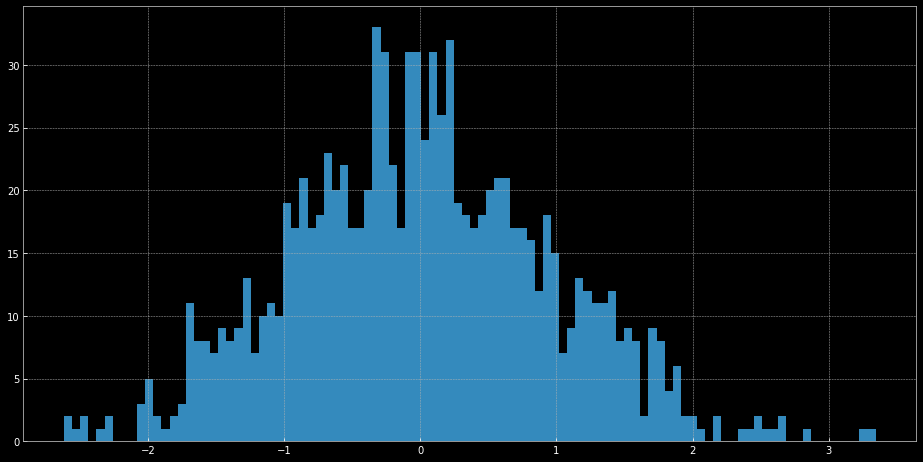

In [57]:
# Numpy bridge!
plt.hist(torch.randn(1000).numpy(), 100);

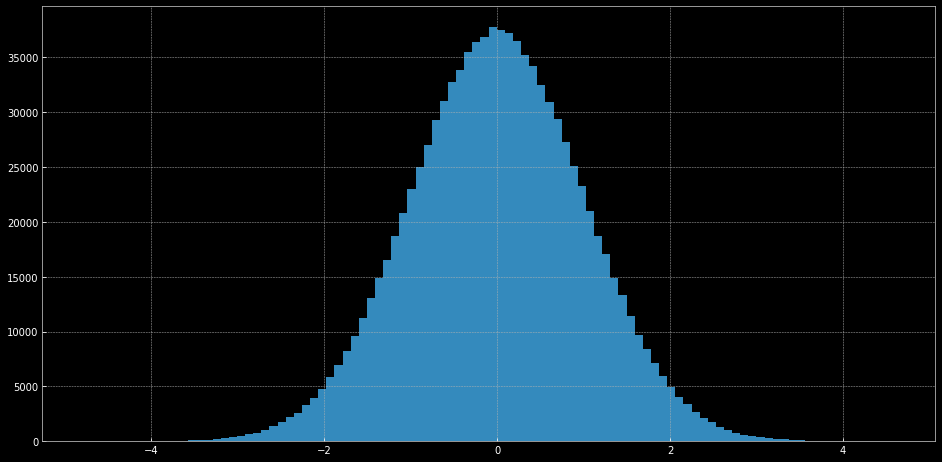

In [58]:
plt.hist(torch.randn(10**6).numpy(), 100);  # how much does this chart weight?
# use rasterized=True for SVG/EPS/PDF!

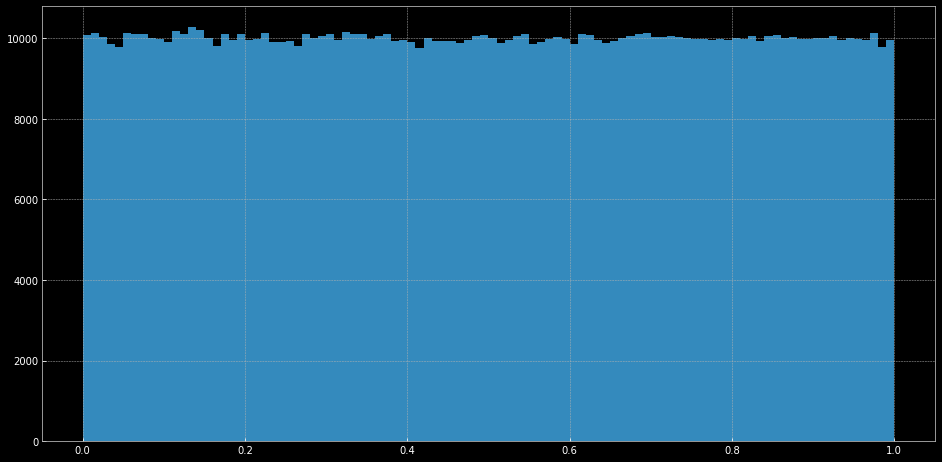

In [59]:
plt.hist(torch.rand(10**6).numpy(), 100);

## Casting - Convert a tensor of one type (dtype) into another type

In [60]:
torch.*Tensor?

In [65]:
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [66]:
m.double()

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]], dtype=torch.float64)

In [67]:
m.byte()

tensor([[2, 5, 3, 7],
        [4, 2, 1, 9]], dtype=torch.uint8)

In [68]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
m.to(device)

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

For those of you who have used Python before may be familiar with NumPy arrays. NumPy arrays/matrices are essentially PyTorch Tensors except that they can only be used on CPUs (very fast still, though! Just not as fast as GPUs...) and they don't perform autodifferentiaiton (more on that later ;) ). We can still convert between the two very nicely!

In [69]:
m_np = m.numpy(); m_np

array([[2., 5., 3., 7.],
       [4., 2., 1., 9.]], dtype=float32)

In [70]:
m_np[0, 0] = -1; m_np

array([[-1.,  5.,  3.,  7.],
       [ 4.,  2.,  1.,  9.]], dtype=float32)

In [71]:
m

tensor([[-1.,  5.,  3.,  7.],
        [ 4.,  2.,  1.,  9.]])

In [72]:
import numpy as np

In [73]:
n_np = np.arange(5)
n = torch.from_numpy(n_np)
print(n_np, n)

[0 1 2 3 4] tensor([0, 1, 2, 3, 4])


In [74]:
n.mul_(2)
n_np

array([0, 2, 4, 6, 8])

## More fun

In [75]:
a = torch.Tensor([[1, 2, 3, 4]])
b = torch.Tensor([[5, 6, 7, 8]])
print(a, b)

tensor([[1., 2., 3., 4.]]) tensor([[5., 6., 7., 8.]])


In [76]:
torch.cat((a, b), 0)

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])

In [77]:
torch.cat((a, b), 1)

tensor([[1., 2., 3., 4., 5., 6., 7., 8.]])

## Much more

There's definitely much more, but this was the basics about `Tensor`s fun.

*Torch* full API should be read at least once.
Hence, go [here](http://pytorch.org/docs/0.3.0/torch.html).
You'll find 100+ `Tensor` operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random numbers, etc are described.